Importamos las librerías que vamos a necesitar para realizar la práctica

In [177]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

Cargamos el dataset en un DataFrame de Pandas

In [178]:
datos = pd.read_csv("vacunaciones.csv")

Vamos a visualizar los primeros y últimos valores de nuestro DataFrame

In [179]:
datos.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [180]:
datos.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3203,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3207,Wales,NaN,2021-02-14,790211.0,784809.0,5402.0,13987.0,26206.0,25.06,24.89,0.17,8312.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


Podemos observar que el DataFrame esta ordenado por país y no por fecha, vamos a ordenarlo por fecha para poder seleccionar los últimos tres días

In [181]:
datos['date'] = pd.to_datetime(datos['date'], dayfirst=True)

In [182]:
datos = datos.sort_values(by='date', ascending=False)

In [183]:
datos.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3022,United Arab Emirates,ARE,2021-02-15,5086835.0,NaN,NaN,31604.0,96169.0,51.43,NaN,NaN,9723.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en
1599,Italy,ITA,2021-02-15,3044535.0,1756512.0,1288023.0,45391.0,56277.0,5.04,2.91,2.13,931.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...
221,Bahrain,BHR,2021-02-15,250946.0,250946.0,NaN,2171.0,7119.0,14.75,14.75,NaN,4184.0,"Pfizer/BioNTech, Sinopharm/Beijing",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1361420...
368,Brazil,BRA,2021-02-15,5293979.0,5076110.0,217869.0,57036.0,241206.0,2.49,2.39,0.10,1135.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
2310,Portugal,PRT,2021-02-15,529021.0,331321.0,197700.0,5672.0,19017.0,5.19,3.25,1.94,1865.0,"Moderna, Pfizer/BioNTech",National Health Service,https://covid19.min-saude.pt/ponto-de-situacao...


In [184]:
datos.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2005,Northern Ireland,NaN,2020-12-13,3623.0,3623.0,NaN,NaN,NaN,0.19,0.19,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3144,Wales,NaN,2020-12-13,8207.0,8207.0,NaN,NaN,NaN,0.26,0.26,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2498,Scotland,NaN,2020-12-13,18996.0,18996.0,NaN,NaN,NaN,0.35,0.35,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
880,England,NaN,2020-12-13,55389.0,55389.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3023,United Kingdom,GBR,2020-12-13,86215.0,86215.0,NaN,NaN,NaN,0.13,0.13,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [188]:
# Rellenar NaNs en 'people_vaccinated' con la media de los valores anteriores
datos['people_vaccinated'] = datos['people_vaccinated'].fillna(datos['people_vaccinated'].rolling(3, min_periods=1).mean())

In [176]:
# media = datos[datos['date'] >= datos['date'].max() - pd.Timedelta(days=2)]['people_vaccinated'].mean()

In [150]:
# datos['people_vaccinated'] = datos['people_vaccinated'].fillna(media)

In [189]:
datos['people_vaccinated'].isna().any()

True

In [193]:
datos[3150:3207]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2405,Russia,RUS,2020-12-21,NaN,614117.0,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
2506,Scotland,NaN,2020-12-21,NaN,614117.0,NaN,NaN,5736.0,NaN,NaN,NaN,1050.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2404,Russia,RUS,2020-12-20,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,Sputnik V,Russian Direct Investment Fund,https://www.reuters.com/article/health-coronav...
567,China,CHN,2020-12-20,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
2505,Scotland,NaN,2020-12-20,60106.0,60106.0,NaN,NaN,5873.0,1.10,1.10,NaN,1075.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3151,Wales,NaN,2020-12-20,23766.0,23766.0,NaN,NaN,2223.0,0.75,0.75,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3087,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
2012,Northern Ireland,NaN,2020-12-20,16068.0,16068.0,NaN,NaN,1778.0,0.85,0.85,NaN,939.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3030,United Kingdom,GBR,2020-12-20,673798.0,673798.0,NaN,NaN,83940.0,0.99,0.99,NaN,1236.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1491,Israel,ISR,2020-12-20,7409.0,7409.0,NaN,7351.0,7351.0,0.09,0.09,NaN,849.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...


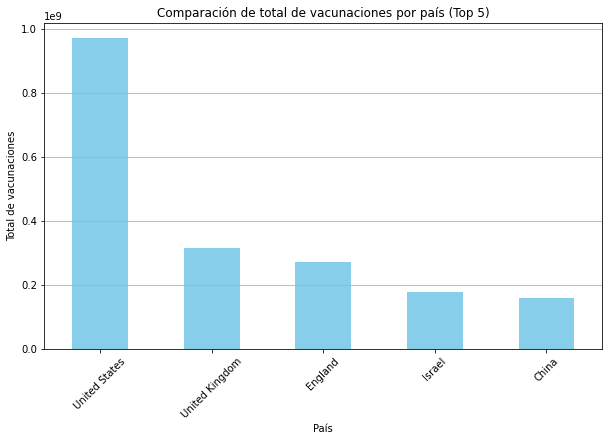

In [152]:
total_vaccinations_by_country = datos.groupby('country')['total_vaccinations'].sum().nlargest(5)

# Crear un gráfico de barras para comparar los 5 países
plt.figure(figsize=(10, 6))
total_vaccinations_by_country.plot(kind='bar', color='skyblue')
plt.title('Comparación de total de vacunaciones por país (Top 5)')
plt.xlabel('País')
plt.ylabel('Total de vacunaciones')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()